In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from pandas.plotting import scatter_matrix
from scipy.stats import chi2_contingency
from helpers import categorical_univariate , categorical_bivariate
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import ttest_ind
from pandas.core.base import duplicated
import seaborn as sns

In [73]:
data = pd.read_csv('Employee.csv')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [74]:
data=data.drop(columns=("EverBenched"))

In [75]:
data.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [76]:
data['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [77]:
duplicates_rows = data[data.duplicated()]
print ("Duplicated rows are :")
duplicates_rows

Duplicated rows are :


,Education,JoiningYear,City,PaymentTier,Age,Gender,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,5,1
130,Bachelors,2017,Bangalore,3,26,Female,4,0
138,Bachelors,2017,New Delhi,3,28,Male,2,0
160,Bachelors,2014,Bangalore,3,28,Female,3,0
167,Bachelors,2014,Bangalore,3,25,Male,3,0
...,...,...,...,...,...,...,...,...
4646,Bachelors,2013,Bangalore,3,25,Female,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,4,0
4650,Masters,2018,New Delhi,3,27,Male,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,2,0


In [78]:
duplicate_count = data[data.duplicated()].shape[0]

# Print the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 2098


In [79]:
# Remove duplicate rows and update 'data'
data = data.drop_duplicates()

# If you want to reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

In [80]:
duplicates_rows = data[data.duplicated()]
print ("Duplicated rows are :")
duplicates_rows

Duplicated rows are :


,Education,JoiningYear,City,PaymentTier,Age,Gender,ExperienceInCurrentDomain,LeaveOrNot


In [81]:
# Function to Apply test statistic for all categorical colunms
def test_statistic (column_name) :
  """
    Perform a Chi-squared test for independence between two categorical variables.
    Args:
        column_name (str): a categorical variable.
    Returns:
        chi2_stat (float): Chi-squared test statistic.
        p_val (float): P-value of the test.
        dof (int): Degrees of freedom.
        expected (ndarray): Expected frequencies under the null hypothesis.
    """
  # Create Contingency Table
  contingency_table = pd.crosstab(data[column_name], data['LeaveOrNot'])
  print("our table ",contingency_table)

  # Perform Chi-squared Test
  chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
  print(f"Chi-squared Statistic: {chi2_stat}")
  print(f"P-value: {p_val}")
  print(f"Degrees of Freedom: {dof}")
  print("Expected Frequencies:")
  print(expected)

In [82]:
test_statistic ("Education")

our table  LeaveOrNot     0    1
Education            
Bachelors   1115  685
Masters      316  284
PHD          115   40
Chi-squared Statistic: 29.14194876342623
P-value: 4.6979266319467485e-07
Degrees of Freedom: 2
Expected Frequencies:
[[1089.15851272  710.84148728]
 [ 363.05283757  236.94716243]
 [  93.78864971   61.21135029]]


In [83]:
test_statistic ("City")

our table  LeaveOrNot    0    1
City                
Bangalore   682  380
New Delhi   494  248
Pune        370  381
Chi-squared Statistic: 57.26352247717002
P-value: 3.676072659961153e-13
Degrees of Freedom: 2
Expected Frequencies:
[[642.6035225  419.3964775 ]
 [448.97534247 293.02465753]
 [454.42113503 296.57886497]]


In [84]:
test_statistic ("Gender")

our table  LeaveOrNot    0    1
Gender              
Female      581  581
Male        965  428
Chi-squared Statistic: 97.69447939593573
P-value: 4.8818154418592804e-23
Degrees of Freedom: 1
Expected Frequencies:
[[703.11232877 458.88767123]
 [842.88767123 550.11232877]]


In [85]:
# Select numeric values
numeric_df = data.select_dtypes(include='number')
id = numeric_df ['LeaveOrNot']
numeric_df.drop ("LeaveOrNot", axis =1,inplace=True  )
age = numeric_df ['Age']
numeric_df.drop ("Age", axis =1,inplace=True )

JoiningYear


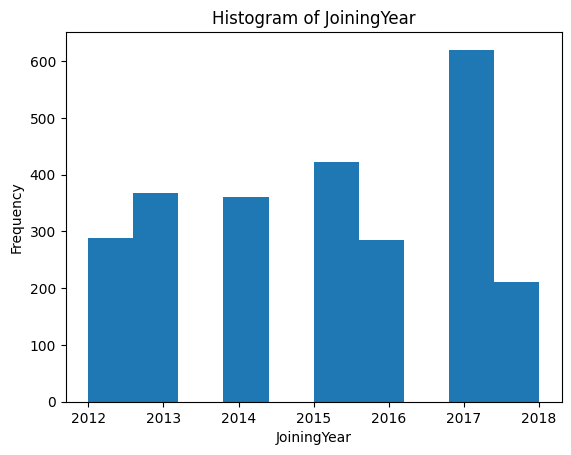

PaymentTier


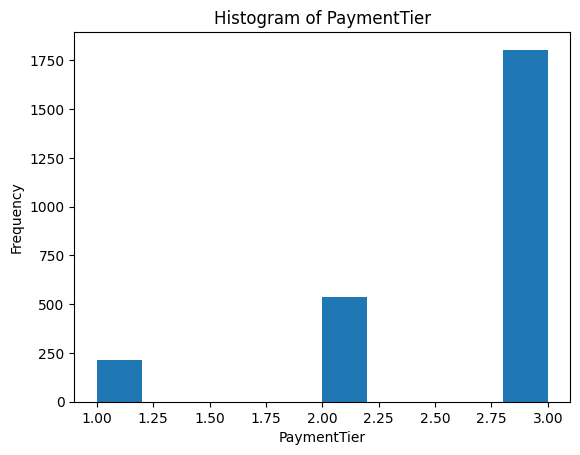

ExperienceInCurrentDomain


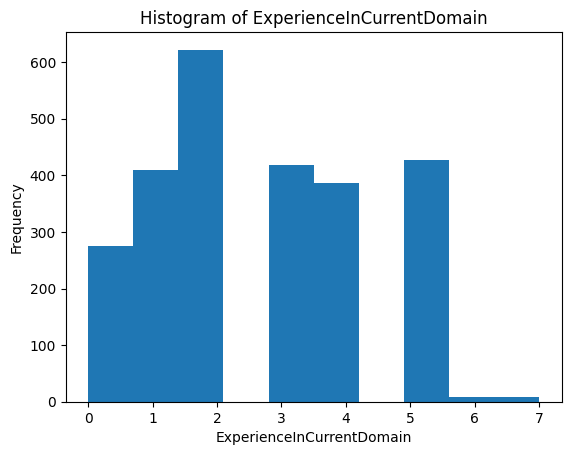

In [86]:
# Univariate analysis - Histograms distributions
for column in numeric_df.columns:
    plt.figure()
    print (column)
    numeric_df[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

JoiningYear


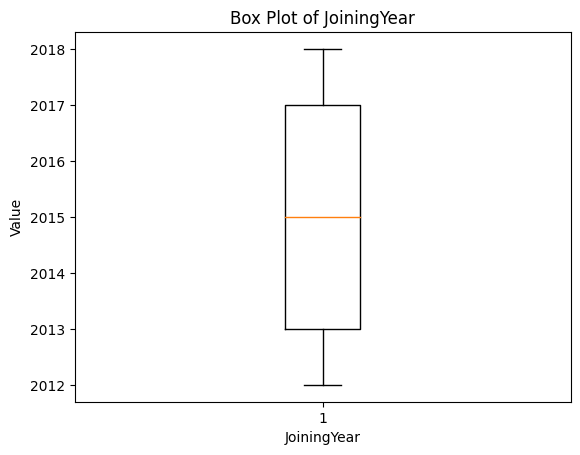

PaymentTier


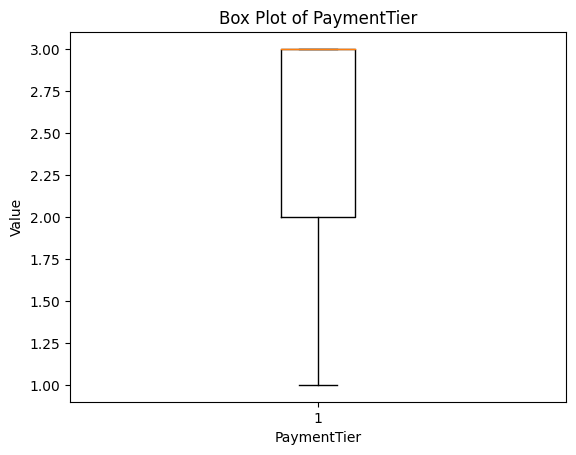

ExperienceInCurrentDomain


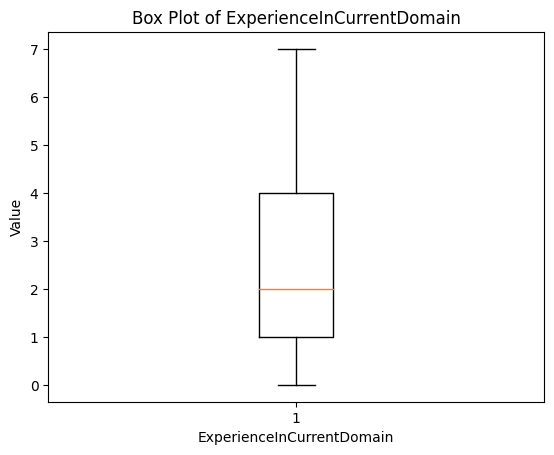

In [87]:
for column in numeric_df.columns:
    plt.figure()
    print(column)
    plt.boxplot(numeric_df[column])
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title(f'Box Plot of {column}')
    plt.show()

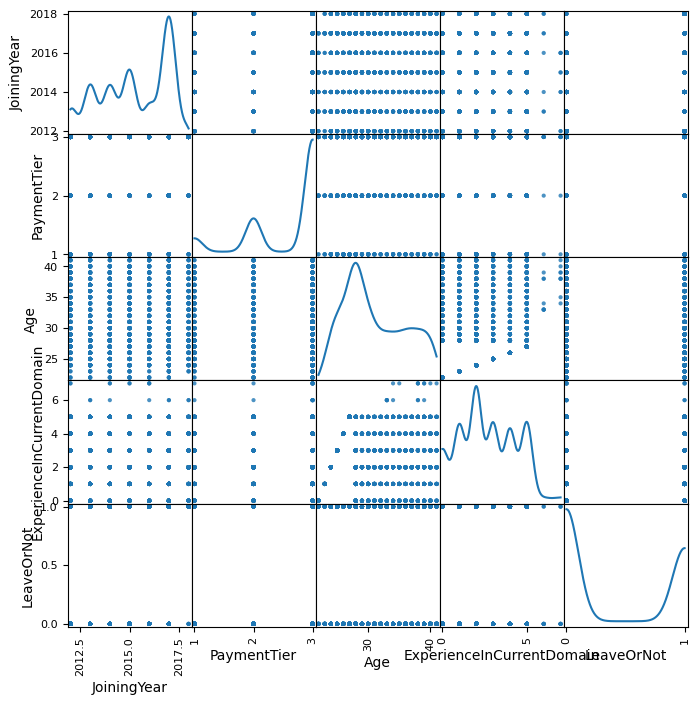

In [88]:
# Check for Multicollinearity
scatter_matrix(data , alpha=0.8, figsize=(8, 8), diagonal='kde')
plt.show()

In [89]:
def plot_skewness_all_features(df):
    num_features = df.select_dtypes(include=['float64', 'int64'])  # Select numerical features
    num_cols = num_features.columns
    num_cols_count = len(num_cols)
    num_rows = math.ceil(num_cols_count / 2)

    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))
    fig.tight_layout(pad=3.0)

    for i, col in enumerate(num_cols):
        ax = axes[i // 2, i % 2] if num_cols_count > 1 else axes[i % 2]
        sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.show()

<ipython-input-89-9b6fa234317d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")
<ipython-input-89-9b6fa234317d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax, label=f"Skewness: {df[col].skew():.2f}")
<ipython-input-89-

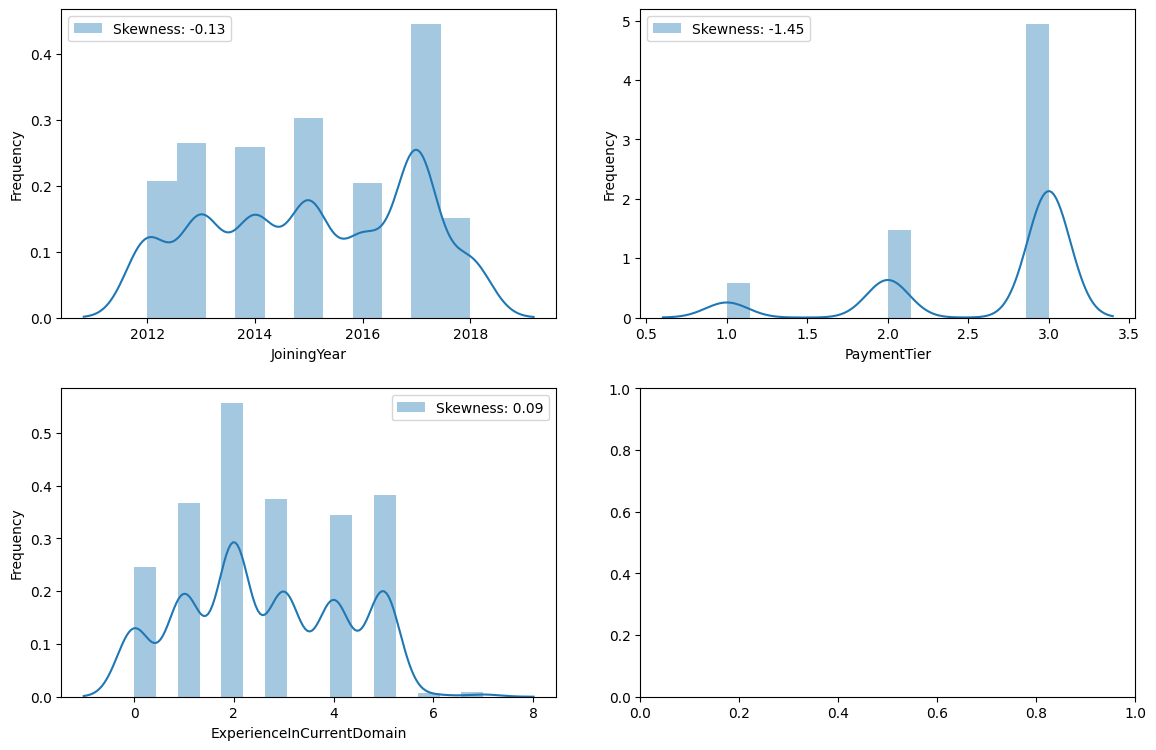

In [90]:
plot_skewness_all_features(numeric_df)

In [91]:
def test_numeric_features(df, numeric_columns, target_column):
    results = {}
    for column in numeric_columns:
        category_0 = df[column][df[target_column] == 0]
        category_1 = df[column][df[target_column] == 1]
        # Perform t-test
        statistic, p_value = ttest_ind(category_0, category_1)
        results[column] = p_value

    return results

In [92]:
num_cols=numeric_df.columns

In [93]:
results = test_numeric_features(data, numeric_columns=num_cols, target_column='LeaveOrNot')
print(results)

{'JoiningYear': 6.4442957963150105e-12, 'PaymentTier': 4.706212889088187e-08, 'ExperienceInCurrentDomain': 0.2098540613547004}


In [94]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [95]:
data = pd.get_dummies(data,drop_first=True)

In [96]:
X = data.drop(columns=['LeaveOrNot'])
y = data['LeaveOrNot']

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [98]:
# Automatically split columns into categorical and numeric
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [99]:
# Create transformers
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [100]:
# Combine transformers
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),('cat', categorical_transformer, categorical_cols)] ,remainder='passthrough')

In [101]:
# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [102]:
# Balance the classes using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [103]:
# # Define and compile your DNN model
# def build_and_train_model(dropout_rate, activation, l2_strength, num_neurons, num_layers):
#     model = keras.Sequential()
#     model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_strength), input_dim=X_train_resampled.shape[1]))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(dropout_rate))
#     model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_strength)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(dropout_rate))
#     model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_strength)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(dropout_rate))
#     model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(l2_strength)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dropout(dropout_rate))
#     model.add(layers.Dense(1, activation='sigmoid'))

#     initial_learning_rate = 0.01
#     lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#         initial_learning_rate, decay_steps=100, decay_rate=0.9)

#     model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

#     early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

#     history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=0)

#     y_train_pred = model.predict(X_train_resampled)
#     y_train_pred_binary = (y_train_pred > 0.5).astype(int)
#     train_accuracy = accuracy_score(y_train_resampled, y_train_pred_binary)

#     y_pred = model.predict(X_test)
#     y_pred_binary = (y_pred > 0.5).astype(int)
#     test_accuracy = accuracy_score(y_test, y_pred_binary)

#     return model, train_accuracy, test_accuracy

In [104]:
# from sklearn.base import BaseEstimator, ClassifierMixin
# from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
# import numpy as np

# # Define the custom estimator
# class DeepLearningEstimator(BaseEstimator, ClassifierMixin):
#     def __init__(self, dropout_rate, activation, l2_strength, num_neurons, num_layers):
#         self.dropout_rate = dropout_rate
#         self.activation = activation
#         self.l2_strength = l2_strength
#         self.num_neurons = num_neurons
#         self.num_layers = num_layers
#         self.model = None

#     def fit(self, X, y):
#         # Create and train the DNN model based on the provided hyperparameters
#         self.model, _, _ = build_and_train_model(self.dropout_rate, self.activation, self.l2_strength, self.num_neurons, self.num_layers)
#         return self

#     def predict(self, X):
#         # Check if the model has been trained
#         check_is_fitted(self)
#         # Make predictions using the trained model
#         y_pred = self.model.predict(X)
#         y_pred_binary = (y_pred > 0.5).astype(int)
#         return y_pred_binary

In [105]:
# # Define a parameter grid for the grid search
# param_grid = {
#     'dropout_rate': [0.2, 0.3, 0.4],
#     'activation': ['relu', 'tanh', 'sigmoid'],
#     'l2_strength': [0.001, 0.01, 0.1],
#     'num_neurons': [64, 128, 256],
#     'num_layers': [2, 3]
# }
# # Create a custom scorer for GridSearchCV based on accuracy
# custom_scorer = make_scorer(accuracy_score)

In [106]:
# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=None,
#     param_grid=param_grid,
#     scoring=custom_scorer,
#     n_jobs=-1,
#     cv=3
# )

# # Perform the grid search
# grid_search.fit(X_train_resampled, y_train_resampled)

# # Get the best hyperparameters from the grid search
# best_hyperparameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

In [107]:
# Define and compile your DNN model with regularization, dropout, batch normalization, and more hidden layers/neurons
model = keras.Sequential([
    layers.Input(shape=(X_train_resampled.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

In [108]:
# Use a learning rate schedule to gradually reduce the learning rate
initial_learning_rate = 0.01
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate / (10 ** (epoch // 10)))

In [109]:
# Compile the model with the RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=initial_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [111]:
# Train the model with early stopping based on validation loss
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[lr_schedule, early_stopping])

Epoch 1/100
52/52 [==============================] - 6s 24ms/step - loss: 1.0707 - accuracy: 0.5761 - val_loss: 0.8981 - val_accuracy: 0.6528 - lr: 0.0100
Epoch 2/100
52/52 [==============================] - 1s 11ms/step - loss: 0.8564 - accuracy: 0.6587 - val_loss: 0.8100 - val_accuracy: 0.6895 - lr: 0.0100
Epoch 3/100
52/52 [==============================] - 1s 11ms/step - loss: 0.7719 - accuracy: 0.6709 - val_loss: 0.7532 - val_accuracy: 0.6235 - lr: 0.0100
Epoch 4/100
52/52 [==============================] - 1s 10ms/step - loss: 0.7077 - accuracy: 0.7034 - val_loss: 0.7482 - val_accuracy: 0.6137 - lr: 0.0100
Epoch 5/100
52/52 [==============================] - 1s 10ms/step - loss: 0.6807 - accuracy: 0.7046 - val_loss: 0.6678 - val_accuracy: 0.7017 - lr: 0.0100
Epoch 6/100
52/52 [==============================] - 1s 10ms/step - loss: 0.6558 - accuracy: 0.7211 - val_loss: 0.6914 - val_accuracy: 0.6944 - lr: 0.0100
Epoch 7/100
52/52 [==============================] - 1s 10ms/step - lo

In [112]:
# Calculate accuracy on the training set
y_train_pred = model.predict(X_train_resampled)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred_binary)
print(f'Training Accuracy: {train_accuracy:.2f}')

78/78 [==============================] - 0s 3ms/step
Training Accuracy: 0.77


In [113]:
# Calculate accuracy on Train set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Test Accuracy: {accuracy:.2f}')

16/16 [==============================] - 0s 2ms/step
Test Accuracy: 0.80


In [114]:
# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       309
           1       0.89      0.56      0.69       202

    accuracy                           0.80       511
   macro avg       0.83      0.76      0.77       511
weighted avg       0.82      0.80      0.79       511

